In [53]:
# Import Nesseary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import random
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# 1. Data Clening 

1.1 Understanding the data
    (Information based on 2024 Kaggle Stack Overflow Survey.<p>
    link: https://www.kaggle.com/datasets/berkayalan/stack-overflow-annual-developer-survey-2024)<p>
    Used as Dictionary<p>
    MC = Multiple Choice<p>

    Part 1: Basic Information
            ResponseId; 
            MainBranch: Describes the respondent's primary role; 
            Age;
            Employment: MC;
            RemoteWork: Describes the working arrangement (Remote, In-person, Hybrid);
            Check: A control question to ensure respondents are paying attention (in this case, "Apples")
            CodingActivities: Activities related to coding outside work, MC

    Part 2: Education + Work + Career
            EdLevel: Highest level of education completed
            LearCode: How do you learn to code? MC;
            LearnCodeOnline: What online resources do you use to learn to code? MC;
            TechDoc: What is the source of the technical documentation you use most often to learn tocode? MC;
            YearsCode；
            YearsCodePro：How many years have you coded professionally;
            DevType;
            OrgSize;
            PurchaseInfluence: What level of influence do you, personally, have over new technology purchases atyour organization?;
            BuyNewTool: MC;
            BuildvsBuy: When asked to provide a recommendation for solving a problem at work with a newtool or software, what has been your most recent choice of the following?;
            TechEndorse: What product feature do you care about most when endorsing a technologypurchase? MC;
            Country;
            Currency;
            CompTotal: Total annual compensation

    Part 3: Tech and Tech Culture ALL MC
            LanguageHaveWorkedWith;
            LanguageWantToWorkWith;
            LanguageAdmired;
            DatabaseHaveWorkedWith;
            DatabaseWantToWorkWith;
            DatabaseAdmired;
            PlatformHaveWorkedWith;
            PlatformWantToWorkWith;
            PlatformAdmired;
            WebframeHaveWorkedWith;
            WebframeWantToWorkWith;
            WebframeAdmired;
            EmbeddedHaveWorkedWith;
            EmbeddedWantToWorkWith;
            EmbeddedAdmired;
            MiscTechHaveWorkedWith;
            MiscTechWantToWorkWith;
            MiscTechAdmired;
            ToolsTechHaveWorkedWith;
            ToolsTechWantToWorkWith;
            ToolsTechAdmired;
            NEWCollabToolsHaveWorkedWith;
            NEWCollabToolsWantToWorkWith;
            NEWCollabToolsAdmired;
            OpSysPersonal use;
            OpSysProfessional use;
            OfficeStackAsyncHaveWorkedWith;
            OfficeStackAsyncWantToWorkWith;
            OfficeStackAsyncAdmired;
            OfficeStackSyncHaveWorkedWith;
            OfficeStackSyncWantToWorkWith;
            OfficeStackSyncAdmired;
            AISearchDevHaveWorkedWith;
            AISearchDevWantToWorkWith;
            AISearchDevAdmired;

    Part 4: Stack Community
            NEWSOSites: Which of the following Stack Overflow sites have you visited? MC;
            SOVisitFreq;
            SOAccount;
            SOPartFreq;
            SOHow: How do you use Stack Overflow? MC;
            SOComm: Do you consider yourself a member of the Stack Overflow community?;

    Part 5: Aritificial Intelligence
            AISelect: Do you currently use AI tools in your development process?;
            AISent: How favorable is your stance on using AI tools as part of your developmentworkflow?;
            AIBen: For the AI tools you use as part of your development workflow, what are the MOSTimportant benefits you are hoping to achieve? MC;
            AIAcc: How much do you trust the accuracy of the output from AI tools as part of yourdevelopment workflow?
            AIComplex;
            AIToolCurrently Using: MC;
            AIToolInterested in Using: MC;
            AIToolNot interested in Using: MC;
            AINextMuch more integrated: MC;
            AINextNo change: MC;
            AINextMore integrated: MC;
            AINextLess integrated: MC;
            AINextMuch less integrated: MC;
            AIThreat;
            AIEthics: MC;
            AIChallenges: MC;
    
    Part 6: TeamsBranch
            TBranch: Would you like to participate in the Professional Developer Series?(Yes or No);
            ICorPM:Are you an individual contributor or people manager?;
            WorkExp;
            Knowledge_1: I have interactions with people outside of myimmediate team.;
            Knowledge_2: Knowledge silos prevent me from getting ideas acrossthe organization (i.e., one individual or team hasinformation that isn't shared with others);
            Knowledge_3: I can find up-to-date information within my organizationto help me do my job.;
            Knowledge_4: I am able to quickly find answers to my questions withexisting tools and resources.;
            Knowledge_5: I know which system or resource to use to findinformation and answers to questions I have.;
            Knowledge_6: I often find myself answering questions that I’vealready answered before.;
            Knowledge_7: Waiting on answers to questions often causesinterruptions and disrupts my workflow.;
            Knowledge_8: I feel like I have the tools and/or resources to quicklyunderstand and work on any area of my company'scode/system/platform.;
            Knowledge_9: I have asked my employer to reimburse me for tools ora product that helps me do my job better or faster.;
            Frequency_1: Needing help from people outside of your immediate team?;
            Frequency_2: Interacting with people outside of your immediate team?;
            Frequency_3: Encountering knowledge silos (where one individual or team has information that's notshared or distributed with other individuals or teams) at work?;
            TimeSearching;
            TimeAnswering;
            Frustration: MC;
            ProfessionalTech: My company has what? MC;
            ProfessionalCloud:At my company, where our applications, databases and services are hosted? MC;
            ProfessionalQuestion:When you have a technical question at work, where do you first go to get ananswer? MC;
            Industry;
            JobSatPoints_1: Driving strategy for my team;
            JobSatPoints_4: Improving quality of code and developer environments;
            JobSatPoints_5: Learning and using new technology, including platforms, APIs and libraries;
            JobSatPoints_6: Designing and building environments, databases, and all things architecture;
            JobSatPoints_7: Being a power user of a tool, developer language or process that others cometo for answers and guidance about;
            JobSatPoints_8: Working with new and/or top-quality hardware;
            JobSatPoints_9: A well-staffed/sourced internal network that makes observability easy sonetwork or runtime issues are addressed and fixed easily;
            JobSatPoints_10: Total;
            JobSatPoints_11: Unknow, from the survey, there is no selection and question for 11. Might be typo;
            JobSat: How satisfied are you in your current professional developer role?;
            ConvertedCompYearly: Annual salaries of the participants in USD.;

1.2 Import Dataset

In [54]:
# Load Data
data = pd.read_csv("clean_kaggle_data_2024.csv")

# Check Data
data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSat,ConvertedCompYearly
0,73,I am a developer by profession,18-24,"Employed, full-time;Student, full-time;Indepen...",Hybrid,Apples,Hobby;School or academic work;Professional dev...,Secondary school,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,10.0,75.0,65.0,100.0,100.0,100.0,50.0,90.0,10.0,7322.0
1,380,I am a developer by profession,35-44,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,Master’s degree,Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,91295.0
2,390,I am a developer by profession,25-34,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,0.0,0.0,20.0,30.0,5.0,20.0,10.0,5.0,10.0,110000.0
3,393,I am a developer by profession,35-44,"Employed, full-time",Hybrid,Apples,Hobby;Contribute to open-source projects,Professional degree,Books / Physical media,NaN,...,0.0,10.0,30.0,5.0,10.0,0.0,0.0,5.0,7.0,161044.0
4,399,I am a developer by profession,45-54,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,30.0,10.0,30.0,0.0,0.0,0.0,5.0,195000.0


1.3 <p>
In this section, my main idea is to convert all the string values in the dataset into numerical values. Since the survey contains many multiple-choice questions, I will integrate my own ideas with suggestions provided by ChatGPT-4o to either consolidate or remove certain columns. 


1.3.1 Dealing with Part 1

In [55]:
data_cleaned = data.copy()

# Get dummy variables for MainBranch
data_cleaned['MainBranch'] = data_cleaned['MainBranch'].apply(lambda x: 1 if x == 'I am a developer by profession' else 0)

# Get numerical values for Age, range to average
data_cleaned['Age'] = data_cleaned['Age'].apply(
    lambda x: 18 if x == '18-24' 
    else 29.5 if x == '25-34' 
    else 39.5 if x == '35-44' 
    else 49.5 if x == '45-54' 
    else 59.5 if x == '55-64' 
    else 69.5 if x == '65 years or older' 
    else None
)
# Drop the rows with [Prefer not to say, Under 18 years]
data_cleaned['Age'] = data_cleaned['Age'].dropna()


In [56]:
# Employment
# Prompt for Chatgpt4.0: For the Employment column, I suggest converting responses to numerical values based on labor force participation and employment type. 
# "Employed, full-time" could have a higher value than "Employed, part-time," with combinations like "Full-time" and "Independent contractor" 
# indicating higher income. What’s your opinion on this approach?

# Response: Chatgpt4.0 
employment_mapping = {
    'Employed, full-time': 3,
    'Employed, part-time': 2,
    'Independent contractor, freelancer, or self-employed': 2,
    'Not employed, but looking for work': 1,
    'Not employed, and not looking for work': 0,
    'Student, full-time': 1,
    'Student, part-time': 1,
    'Retired': 0,
    'I prefer not to say': None  # Handle "prefer not to say" separately
}

# Apply the mapping
data_cleaned['EmploymentScore'] = data_cleaned['Employment'].apply(
    lambda x: sum(employment_mapping.get(emp_type.strip(), 0) for emp_type in x.split(';'))
)

# Handle missing values if needed
data_cleaned['EmploymentScore'] = data_cleaned['EmploymentScore'].fillna(0)

# Drop the original column
data_cleaned = data_cleaned.drop(columns=['Employment'])

In [57]:
# Remote Work
data_cleaned['RemoteWork'] = data_cleaned['RemoteWork'].apply(
    lambda x: 1 if x == 'Remote' else 0 if x == 'In-person' else None
)

data_cleaned = data_cleaned.dropna(subset=['RemoteWork'])

# I am decided to drop the columns CodingActivities, which less likely to be useful for the analysis
data_cleaned = data_cleaned.drop(columns=['CodingActivities'])

# drop the ResponseId & check and remove duplicates, not correlated to the analysis
data_cleaned = data_cleaned.drop(columns=['ResponseId', 'Check'])


data_cleaned.head()

,MainBranch,Age,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,...,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSat,ConvertedCompYearly,EmploymentScore
1,1,39.5,1.0,Master’s degree,Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,API document(s) and/or SDK document(s),15,6,Data scientist or machine learning specialist,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,91295.0,3
2,1,29.5,1.0,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,NaN,7,7,Student,...,0.0,20.0,30.0,5.0,20.0,10.0,5.0,10.0,110000.0,4
4,1,49.5,1.0,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,38,30,"Developer, full-stack",...,0.0,30.0,10.0,30.0,0.0,0.0,0.0,5.0,195000.0,3
5,1,39.5,1.0,Master’s degree,Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,21,16,"Developer, full-stack",...,0.0,25.0,0.0,15.0,0.0,0.0,0.0,3.0,79481.0,5
6,1,39.5,1.0,Master’s degree,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,21,17,"Developer, back-end",...,0.0,20.0,15.0,20.0,20.0,15.0,0.0,8.0,170000.0,5


1.3.2 Dealing with Part 2

In [58]:
# Define the variable we needed for the analysis
# ['EdLevel','LearnCode','LearnCodeOnline','YearsCode','YearsCodePro','DevType','OrgSize','Country']

# Education Level
def categorize_education_level(ed_level):
    if pd.isna(ed_level):
        return None
    
    # Categorize based on keywords
    if ed_level.lower().startswith('bachelor'):
        return 5
    elif ed_level.lower().startswith('master'):
        return 6
    elif ed_level.lower().startswith('professional'):
        return 7
    elif ed_level.lower().startswith('primary'):
        return 1
    elif ed_level.lower().startswith('secondary'):
        return 2
    elif 'college/university' in ed_level.lower():
        return 3
    elif ed_level.lower().startswith('associate'):
        return 4
    else:
        return None

# Apply the function to the 'EdLevel' column
data_cleaned['EdLevel'] = data_cleaned['EdLevel'].apply(categorize_education_level)

In [59]:
# LearnCode 
# Prompt for Chatgpt4.0: I want to put Learncode and LearnCodeOnline together, do you think that would be a good idea for analysis, if so how could I achieve this?
# Answer: Combining LearnCode and LearnCodeOnline into a single column could be a valuable idea, especially if you're trying to understand how respondents are learning to code across both offline and online sources.
# Create a dictionary to assign scores for LearnCode and LearnCodeOnline
learncode_mapping = {
    'Books / Physical media': 1,
    'Coding Bootcamp': 1,
    'Colleague': 1,
    'Friend or family member': 1,
    'Online Courses or Certification': 1,
    'On the job training': 1,
    'Other online resources (e.g., videos, blogs, forum, online community)': 1,
    'School (i.e., University, College, etc)': 1,
    'Other (please specify)': 1
}

learncodeonline_mapping = {
    'Stack Overflow': 1,
    'Blogs': 1,
    'Online community (including social media)': 1,
    'Video-based online courses': 1,
    'Online challenges (e.g., daily or weekly coding challenges)': 1,
    'Coding sessions (live or recorded)': 1,
    'Written-based online courses': 1,
    'How-to videos': 1,
    'Auditory material (e.g., podcasts)': 1,
    'Technical documentation': 1,
    'Certification videos': 1,
    'Books': 1,
    'Games that teach programming': 1,
    'AI chatbot or other tool': 1,
    'Written tutorials': 1,
    'Interactive tutorial': 1,
    'Other (please specify)': 1
}

def calculate_learning_score(row):
    learn_code = row['LearnCode'] if pd.notna(row['LearnCode']) else ''
    learn_code_online = row['LearnCodeOnline'] if pd.notna(row['LearnCodeOnline']) else ''
    
    learn_code_score = sum(learncode_mapping.get(method.strip(), 0) for method in learn_code.split(';'))
    learn_code_online_score = sum(learncodeonline_mapping.get(method.strip(), 0) for method in learn_code_online.split(';'))
    
    return learn_code_score + learn_code_online_score

# Apply the function to create a new column 'LearningScore'
data_cleaned['LearningScore'] = data_cleaned.apply(calculate_learning_score, axis=1)

# Replace NaN in 'LearningScore' with 0 (if any still exist)
data_cleaned['LearningScore'] = data_cleaned['LearningScore'].fillna(0)

# Drop the original columns
data_cleaned = data_cleaned.drop(columns=['LearnCode', 'LearnCodeOnline'])


In [60]:
# DevType
data_cleaned = pd.get_dummies(data_cleaned, columns=['DevType'], prefix='DevType')

# OrgSize
data_cleaned['OrgSize'] = data_cleaned['OrgSize'].apply(
    lambda x: 1 if x == 'Just me - I am a freelancer, sole proprietor, etc.' 
    else 5 if x == '2 to 9 employees'
    else 15 if x == '10 to 19 employees'
    else 60 if x == '20 to 99 employees'
    else 300 if x == '100 to 499 employees'
    else 750 if x == '500 to 999 employees'
    else 3000 if x == '1,000 to 4,999 employees'
    else 7500 if x == '5,000 to 9,999 employees'
    else 10000 if x == '10,000 or more employees'
    else None
)

In [61]:
# List of countries by income group
# Source: https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups
low_income_economies = [
    "Afghanistan", "Korea, Dem. People's Rep", "South Sudan", "Burkina Faso", "Liberia",
    "Sudan", "Burundi", "Madagascar", "Syrian Arab Republic", "Central African Republic",
    "Malawi", "Togo", "Chad", "Mali", "Uganda", "Congo, Dem. Rep", "Mozambique", "Yemen, Rep.",
    "Eritrea", "Niger", "Ethiopia", "Rwanda", "Gambia, The", "Sierra Leone", "Guinea-Bissau", "Somalia"
]

lower_middle_income_economies = [
    "Angola", "Honduras", "Papua New Guinea", "Bangladesh", "India", "Philippines", "Benin", 
    "Jordan", "Samoa", "Bhutan", "Kenya", "São Tomé and Principe", "Bolivia", "Kiribati", 
    "Senegal", "Cabo Verde", "Kyrgyz Republic", "Solomon Islands", "Cambodia", "Lao PDR", 
    "Sri Lanka", "Cameroon", "Lebanon", "Tajikistan", "Comoros", "Lesotho", "Tanzania", 
    "Congo, Rep.", "Mauritania", "Timor-Leste", "Côte d'Ivoire", "Micronesia, Fed. Sts.", 
    "Tunisia", "Djibouti", "Morocco", "Uzbekistan", "Egypt, Arab Rep.", "Myanmar", 
    "Vanuatu", "Eswatini", "Nepal", "Vietnam", "Ghana", "Nicaragua", "West Bank and Gaza", 
    "Guinea", "Nigeria", "Zambia", "Haiti", "Pakistan", "Zimbabwe"
]

upper_middle_income_economies = [
    "Albania", "Equatorial Guinea", "Moldova", "Algeria", "Fiji", "Mongolia", "Argentina", 
    "Gabon", "Montenegro", "Armenia", "Georgia", "Namibia", "Azerbaijan", "Grenada", 
    "North Macedonia", "Belarus", "Guatemala", "Paraguay", "Belize", "Indonesia", "Peru", 
    "Bosnia and Herzegovina", "Iran, Islamic Rep.", "Serbia", "Botswana", "Iraq", 
    "South Africa", "Brazil", "Jamaica", "St. Lucia", "China", "Kazakhstan", 
    "St. Vincent and the Grenadines", "Colombia", "Kosovo", "Suriname", "Costa Rica", 
    "Libya", "Thailand", "Cuba", "Malaysia", "Tonga", "Dominica", "Maldives", "Türkiye", 
    "Dominican Republic", "Marshall Islands", "Turkmenistan", "Ecuador", "Mauritius", 
    "Tuvalu", "El Salvador", "Mexico", "Ukraine"
]

high_income_economies = [
    "American Samoa", "Gibraltar", "Palau", "Andorra", "Greece", "Panama", "Antigua and Barbuda", 
    "Greenland", "Poland", "Aruba", "Guam", "Portugal", "Australia", "Guyana", "Puerto Rico", 
    "Austria", "Hong Kong SAR, China", "Qatar", "Bahamas, The", "Hungary", "Romania", "Bahrain", 
    "Iceland", "Russian Federation", "Barbados", "Ireland", "San Marino", "Belgium", "Isle of Man", 
    "Saudi Arabia", "Bermuda", "Israel", "Seychelles", "British Virgin Islands", "Italy", 
    "Singapore", "Brunei Darussalam", "Japan", "Sint Maarten (Dutch part)", "Bulgaria", 
    "Korea, Rep.", "Slovak Republic", "Canada", "Kuwait", "Slovenia", "Cayman Islands", 
    "Latvia", "Spain", "Channel Islands", "Liechtenstein", "St. Kitts and Nevis", 
    "Chile", "Lithuania", "St. Martin (French part)", "Croatia", "Luxembourg", 
    "Sweden", "Curaçao", "Macao SAR, China", "Switzerland", "Cyprus", "Malta", "Taiwan, China", 
    "Czechia", "Monaco", "Trinidad and Tobago", "Denmark", "Nauru", "Turks and Caicos Islands", 
    "Estonia", "Netherlands", "United Arab Emirates", "Faroe Islands", "New Caledonia", 
    "United Kingdom", "Finland", "New Zealand", "United States", "France", 
    "Northern Mariana Islands", "Uruguay", "French Polynesia", "Norway", "Virgin Islands (U.S.)", 
    "Germany", "Oman"
]

# Function to classify countries based on the provided income lists
def classify_country_by_income(country):
    if country in high_income_economies:
        return 'High Income'
    elif country in upper_middle_income_economies:
        return 'Upper-Middle Income'
    elif country in lower_middle_income_economies:
        return 'Lower-Middle Income'
    elif country in low_income_economies:
        return 'Low Income'
    else:
        return np.nan  # Return NaN if the country isn't in any list

# Apply the function to the 'Country' column
data_cleaned['CountryIncomeCategory'] = data_cleaned['Country'].apply(classify_country_by_income)

# Drop the columns that are not needed
data_cleaned = data_cleaned.drop(columns=['TechDoc','PurchaseInfluence','BuyNewTool','TechEndorse','BuildvsBuy','CompTotal', 'Currency','Country'])

1.3.3 Dealing with Part 3 <p>
In this section, I will focus only on features where the respondents have done extensive development work over the past year. My idea is that each time a programmer selects a programming, scripting, or markup language; database; cloud platform; web framework or technology; embedded system or technology; other frameworks and libraries; developer tools for compiling, building, and testing; development environments; operating systems; collaborative work management or code documentation tools; communication tools; or AI-powered search and developer tools, their overall "working skill" score increases by 1. I expect to find a positive correlation between working skills and income — in other words, as working skills increase, income should also increase.

In [62]:
# Lsit of columns
Worked_with = [
    'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
    'WebframeHaveWorkedWith', 'EmbeddedHaveWorkedWith', 'MiscTechHaveWorkedWith',
    'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith','OfficeStackAsyncHaveWorkedWith',
    'OfficeStackSyncHaveWorkedWith', 'AISearchDevHaveWorkedWith'
]

# List of columns to be dropped
columns_to_drop_part3 = [
    'LanguageWantToWorkWith', 'DatabaseWantToWorkWith', 'PlatformWantToWorkWith',
    'WebframeWantToWorkWith', 'EmbeddedWantToWorkWith', 'MiscTechWantToWorkWith',
    'ToolsTechWantToWorkWith', 'NEWCollabToolsWantToWorkWith', 'OfficeStackAsyncWantToWorkWith',
    'OfficeStackSyncWantToWorkWith', 'AISearchDevWantToWorkWith',
    'LanguageAdmired', 'DatabaseAdmired', 'PlatformAdmired', 'WebframeAdmired',
    'EmbeddedAdmired', 'MiscTechAdmired', 'ToolsTechAdmired', 'NEWCollabToolsAdmired',
    'OfficeStackAsyncAdmired', 'OfficeStackSyncAdmired', 'AISearchDevAdmired',
    'OpSysPersonal use', 'OpSysProfessional use'
]

In [63]:
# Function to calculate TechScore
def calculate_tech_score(df, worked_with_columns):
    tech_data = df[worked_with_columns]
    tech_data = tech_data.fillna('0')
    tech_counts = tech_data.apply(lambda col: col.apply(lambda x: len([item.strip() for item in str(x).split(';') if item.strip() and item != '0'])))    
    tech_score = tech_counts.sum(axis=1)
    return tech_score

# Calculate the TechScore and add it as a new column
data_cleaned['TechScore'] = calculate_tech_score(data_cleaned, Worked_with)

# Drop the columns that are not needed
data_cleaned = data_cleaned.drop(columns=columns_to_drop_part3)
data_cleaned = data_cleaned.drop(columns=Worked_with)

1.3.4 Dealing with Part 4 <p>
Stack Community question, not related to our main focus

In [64]:
# List of columns to be dropped
columns_to_drop_part4 = [
    'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'SOHow',
]

# Drop the columns that are not needed
data_cleaned = data_cleaned.drop(columns=columns_to_drop_part4)

1.3.5 Dealing with Part 5 <p>
Artificial Intelligence question, not related to our main focus

In [65]:
# List of columns to be dropped
columns_to_drop_part5 = [
    'AISelect','AISent','AIBen','AIAcc','AIComplex','AIToolCurrently Using',
    'AIToolInterested in Using','AIToolNot interested in Using',
    'AINextMuch more integrated','AINextNo change','AINextMore integrated',
    'AINextLess integrated','AINextMuch less integrated','AIThreat',
    'AIEthics','AIChallenges'
]

# Drop the columns that are not needed
data_cleaned = data_cleaned.drop(columns=columns_to_drop_part5)

1.3.6 Dealing with Part 6 <p>
The survey in this part can be segements into three parts, Knowledge Quetsion, Time Efficiency Question and Job Satisfaction Question. Knowledge captures interactions, information access, and collaboration effectiveness, highlighting how well employees share and utilize information. Time Efficiency assesses how effectively employees manage their time, focusing on time spent searching for solutions and handling workflow disruptions. Job Satisfaction measures overall contentment and the specific factors contributing to it, such as role responsibilities and work environment.

In [66]:

# ICorPM
data_cleaned['ICorPM'] = data_cleaned['ICorPM'].apply(
    lambda x: 1 if x == 'People manager' else 0 if x == 'Individual contributor' else None
)

Prompt for Chatgpt4.0: I believe there is a relationship between these 9 questions and income. Please consider the relationship and let me know the reason
Answer:
1.  I have interactions with people outside of my immediate team. 

    Reasoning: Frequent interactions with people outside one's team indicate broader responsibilities and collaboration, which can correlate with higher income. 
2.  Knowledge silos prevent me from getting ideas across the organization.

    Reasoning: In jobs with high confidentiality, such as finance or tech, knowledge silos might be necessary, and those jobs often come with higher pay. Therefore, those who strongly agree may be in higher-paying roles.
3.  I can find up-to-date information within my organization to help me do my job.

    Reasoning: Having access to up-to-date information likely increases efficiency and productivity, potentially correlating with higher income.
4.  I am able to quickly find answers to my questions with existing tools and resources.

    Reasoning: Quick access to answers and resources implies a smooth workflow, which can lead to higher performance and thus higher income. 
5.  I know which system or resource to use to find information and answers to questions I have.

    Reasoning: Knowing which tools or systems to use demonstrates familiarity with internal resources, which can lead to higher efficiency and possibly higher pay. 
6.  I often find myself answering questions that I’ve already answered before.

    Reasoning: Frequent repetition of questions could indicate inefficiency or poor knowledge management, which might correlate with lower income. 
7.  Waiting on answers to questions often causes interruptions and disrupts my workflow.

    Reasoning: Frequent interruptions in workflow due to waiting on answers may suggest inefficiency, which is likely to be negatively correlated with income.
8.  I feel like I have the tools and/or resources to quickly understand and work on any area of my company's code/system/platform.

    Reasoning: Having adequate tools and resources often leads to higher productivity, which is positively associated with higher income.
9.  I have asked my employer to reimburse me for tools or a product that helps me do my job better or faster.

    Reasoning: Requesting reimbursement for tools indicates a proactive approach to improving work efficiency. If the request is fulfilled, it may indicate that the employer values the employee’s role, correlating with higher income.

In [67]:
# Knowlege Question
# Define the mappings for positive and negative knowledge columns
positive_mapping = {
    'Stronglyagree': 2,
    'Agree': 1,
    'Neitheragreenordisagree': 0,
    'Disagree': -1,
    'Stronglydisagree': -2
}

negative_mapping = {
    'Stronglyagree': -2,
    'Agree': -1,
    'Neitheragreenordisagree': 0,
    'Disagree': 1,
    'Stronglydisagree': 2
}

# List of positive and negative knowledge columns
positive_columns = [
    'Knowledge_1', 
    'Knowledge_2', 
    'Knowledge_3', 
    'Knowledge_4', 
    'Knowledge_5', 
    'Knowledge_8', 
    'Knowledge_9'
]

negative_columns = [
    'Knowledge_6', 
    'Knowledge_7'
]

# Apply the positive mapping
for column in positive_columns:
    data_cleaned[column] = data_cleaned[column].map(positive_mapping)

# Apply the negative mapping
for column in negative_columns:
    data_cleaned[column] = data_cleaned[column].map(negative_mapping)

# Create the composite "Knowledge" column by summing across all columns
data_cleaned['Knowledge'] = data_cleaned[positive_columns + negative_columns].sum(axis=1)

# Replace NaN in 'Knowledge' with 0
data_cleaned['Knowledge'] = data_cleaned['Knowledge'].fillna(0)

# Drop the individual Knowledge columns
data_cleaned.drop(columns=positive_columns + negative_columns, inplace=True)

In [68]:
# Time Question
# Define the negative & time frequency mapping for the answers
negative_frequency_mapping = {
    '10+ times a week': -5,
    '6-10 times a week': -4,
    '3-5 times a week': -3,
    '1-2 times a week': -2,
    'Never': 1
}

negative_time_mapping = {
    'Less than 15 minutes a day': 0,
    '15-30 minutes a day': -1,
    '30-60 minutes a day': -2,
    '60-120 minutes a day': -3,
    'Over 120 minutes a day': -4
}

frustration_mapping = {
    'Complexity of tech stack for build': -1,
    'Complexity of tech stack for deployment': -1,
    'Amount of technical debt': -1,
    'Number of software tools in use': -1,
    'Patching/updating core components': -1,
    'Maintaining security of code being produced': -1,
    'Maintaining security of systems/platforms used in work': -1,
    'Reliability of tools/systems used in work': -1,
    'Tracking my work': -1,
    'Showing my contributions': -1,
    'None of these': 0  
}

# Function to calculate frustration score
def calculate_frustration_score(frustration_response):
    if pd.notna(frustration_response):
        challenges = [challenge.strip() for challenge in frustration_response.split(';')]
        return sum(frustration_mapping.get(challenge, 0) for challenge in challenges)
    return 0

# Apply the frustration score calculation
data_cleaned['FrustrationScore'] = data_cleaned['Frustration'].apply(calculate_frustration_score)

# List of frequency and time columns
negative_frequency_columns = ['Frequency_1', 'Frequency_2', 'Frequency_3']
negative_time_columns = ['TimeSearching', 'TimeAnswering']

# Replace frequency responses with their corresponding scores
data_cleaned[negative_frequency_columns] = data_cleaned[negative_frequency_columns].replace(negative_frequency_mapping)

# Replace time responses with their corresponding scores
data_cleaned[negative_time_columns] = data_cleaned[negative_time_columns].replace(negative_time_mapping)

# Fill any unmapped or missing values with 0
data_cleaned[negative_frequency_columns + negative_time_columns] = data_cleaned[negative_frequency_columns + negative_time_columns].fillna(0)

# Calculate the sum of frequency and time scores
frequency_time_sum = data_cleaned[negative_frequency_columns + negative_time_columns].sum(axis=1)

# Add the FrustrationScore to create the CombinedScore
data_cleaned['TimeEffiencyScore'] = frequency_time_sum + data_cleaned['FrustrationScore']

# (Optional) Drop the original frequency, time, and frustration columns
columns_to_drop = negative_frequency_columns + negative_time_columns + ['Frustration']
data_cleaned.drop(columns=columns_to_drop, inplace=True)



In [69]:
# Job Satisfaction Question
# ProfesionalTech
ProfessionalTech_mapping = {
    'Innersource initiative': 1,
    'AI-assisted technology tool(s)':1,
    'DevOps function': 1,
    'Microservices': 1,
    'Developer portal or other central places to find tools/services': 1,
    'Continuous integration (CI) and (more often) continuous delivery': 1,
    'Automated testing': 1,
    'Observability tools': 1,
    'Knowledge sharing community': 1,
    'None of these' : 0
}
# Industry
data_cleaned = pd.get_dummies(data_cleaned, columns=['Industry'], prefix='Industry', drop_first=True)

# JobSat
JobSat_list = [
    'JobSatPoints_1',
    'JobSatPoints_4',
    'JobSatPoints_5',
    'JobSatPoints_6',
    'JobSatPoints_7',
    'JobSatPoints_8',
    'JobSatPoints_9',
    'JobSatPoints_10',
    'JobSatPoints_11',
    'JobSat'
]

# Function to calculate ProfessionalTech score
def calculate_professional_tech_score(professional_tech_response):
    if pd.notna(professional_tech_response):
        technologies = [tech.strip() for tech in professional_tech_response.split(';')]
        return sum(ProfessionalTech_mapping.get(tech, 0) for tech in technologies)
    return 0

# Apply the ProfessionalTech mapping
data_cleaned['ProfessionalTechScore'] = data_cleaned['ProfessionalTech'].apply(calculate_professional_tech_score)

# Check for missing JobSat columns and fill them with 0
missing_columns = [col for col in JobSat_list if col not in data_cleaned.columns]
if missing_columns:
    for col in missing_columns:
        data_cleaned[col] = 0

# Fill NaN values in JobSat_list columns with 0
data_cleaned[JobSat_list] = data_cleaned[JobSat_list].fillna(0)

# Calculate JobSatScore by summing JobSatPoints and adding ProfessionalTechScore
data_cleaned['JobSatScore'] = data_cleaned[JobSat_list].sum(axis=1) + data_cleaned['ProfessionalTechScore']

# Drop the original columns
columns_to_drop = JobSat_list + ['TBranch','ProfessionalCloud','ProfessionalTech','ProfessionalQuestion','ProfessionalTechScore']

data_cleaned.drop(columns=columns_to_drop, inplace=True)

1.3.7 Check the final data, and made adjustment for future analysis

In [70]:
# Replace True and False values with 1 and 0
data_cleaned = data_cleaned.replace({True: 1, False: 0})

# Drop the rows with missing values
data_cleaned = data_cleaned.dropna()

Normalize the OrgSize column ensures its values are on a similar scale as other features, improving model performance and comparability. It prevents features with larger ranges(10000) from dominating algorithms like regression

In [71]:
# Normalize the 'OrgSize' column
orgsize_mean = data_cleaned['OrgSize'].mean()
orgsize_std = data_cleaned['OrgSize'].std()

# Apply the Normalize formula
data_cleaned['OrgSize'] = (data_cleaned['OrgSize'] - orgsize_mean) / orgsize_std

In [72]:
# List of columns that may contain outliers
list_may_contain_outliers = [
    'YearsCode', 'YearsCodePro', 'LearningScore', 'TechScore', 
    'Knowledge', 'TimeEffiencyScore', 'JobSatScore', 'ConvertedCompYearly'
]

# Function to calculate the bounds for outliers
def calculate_outlier_bounds(df, columns):
    bounds = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR 
        bounds[col] = {'Lower Bound': lower_bound, 'Upper Bound': upper_bound}
    return bounds

# Calculate bounds for each column
bounds = calculate_outlier_bounds(data_cleaned, list_may_contain_outliers)

# Display the calculated bounds
print("Outlier Bounds:")
for col, bound in bounds.items():
    print(f"{col}: Lower Bound = {bound['Lower Bound']}, Upper Bound = {bound['Upper Bound']}")


Outlier Bounds:
YearsCode: Lower Bound = -9.5, Upper Bound = 34.5
YearsCodePro: Lower Bound = -10.5, Upper Bound = 25.5
LearningScore: Lower Bound = -1.0, Upper Bound = 15.0
TechScore: Lower Bound = -7.5, Upper Bound = 68.5
Knowledge: Lower Bound = -4.5, Upper Bound = 7.5
TimeEffiencyScore: Lower Bound = -24.5, Upper Bound = 3.5
JobSatScore: Lower Bound = 88.5, Upper Bound = 132.5
ConvertedCompYearly: Lower Bound = -75080.5, Upper Bound = 172987.5


In [73]:
# Function to remove outliers using the calculated bounds
def remove_outliers_using_bounds(df, bounds):
    initial_shape = df.shape
    for col, bound in bounds.items():
        df = df[(df[col] >= bound['Lower Bound']) & (df[col] <= bound['Upper Bound'])]
    final_shape = df.shape
    removed_rows = initial_shape[0] - final_shape[0]
    print(f"Removed {removed_rows} rows containing outliers.")
    return df

# Remove outliers from the dataset
data_cleaned = remove_outliers_using_bounds(data_cleaned, bounds)

Removed 2371 rows containing outliers.


In [74]:
# Save the cleaned data to a CSV file
#output_csv_path = r'D:\UT2024\UofT 2024 Fall/data_cleaned.csv'
#data_cleaned.to_csv(output_csv_path, index=False)

# Check the cleaned data
#data_cleaned.describe()

# 2 Exploratory Data Analysis

2.1 How Does the Distribution of Salaries Across Different Country Income Categories Vary with Age?

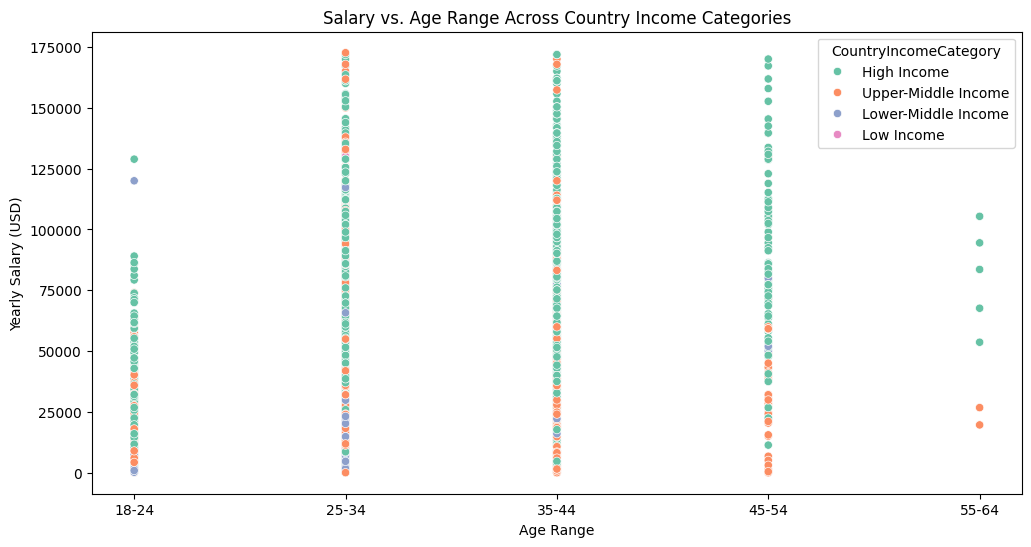

In [75]:
# https://www.cnn.com/2023/08/26/china/35-curse-unemployment-discrimination-intl-hnk/index.html

# Data Cleaning
df_2_1 = data_cleaned[['Age', 'ConvertedCompYearly', 'CountryIncomeCategory']]

# Define age bins and labels
bins = [18, 24, 34, 44, 54, 64, 100] 
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new 'AgeRange'
df_2_1['AgeRange'] = pd.cut(df_2_1['Age'], bins=bins, labels=labels, right=False)

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_2_1,
    x='AgeRange',
    y='ConvertedCompYearly',
    hue='CountryIncomeCategory',
    palette='Set2'
)

# Add labels and title
plt.xlabel('Age Range')
plt.ylabel('Yearly Salary (USD)')
plt.title('Salary vs. Age Range Across Country Income Categories')

# Show the plot
plt.show()


2.2 How Does The Distribution of Survey Respondents Ccross Different Country Income Categories Relate To Their Median Salaries?

In [76]:
# Prompt for Chatgpt4.0: I want to create a pie chart showing the distribution of respondents by country income category, with the color intensity representing the median salary. How can I achieve this?
# Answer：
"""
# Group the data by 'CountryIncomeCategory'
grouped = data_cleaned.groupby('CountryIncomeCategory')

# Calculate the count of respondents and median salary for each category
counts = grouped.size()
median_salaries = grouped['ConvertedCompYearly'].median()

# Ensure the categories are in a specific order
categories = ['High Income', 'Upper-Middle Income', 'Lower-Middle Income', 'Low Income']
counts = counts.reindex(categories)
median_salaries = median_salaries.reindex(categories)

# Normalize the median salaries to map colors
norm = plt.Normalize(median_salaries.min(), median_salaries.max())

# Use a colormap where deeper colors represent higher salaries
colors = plt.cm.Blues(norm(median_salaries))

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=categories,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'color': 'black'}
)

# Add a title to the chart
ax.set_title('Distribution of Respondents by Country Income Category\n(Color intensity represents median salary)', fontsize=14)

# Annotate each wedge with the median salary
for i, p in enumerate(wedges):
    plt.setp(p, edgecolor='white')  # Set edge color for better separation
    ang = (p.theta2 - p.theta1)/2. + p.theta1  # Calculate angle for annotation
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    # Place the annotation outside the pie chart
    ax.annotate(
        f'Median Salary: ${median_salaries.iloc[i]:,.0f}',
        xy=(x, y),
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment,
        fontsize=10,
        textcoords='data',
        arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle)
    )

plt.show()
"""

'\n# Group the data by \'CountryIncomeCategory\'\ngrouped = data_cleaned.groupby(\'CountryIncomeCategory\')\n\n# Calculate the count of respondents and median salary for each category\ncounts = grouped.size()\nmedian_salaries = grouped[\'ConvertedCompYearly\'].median()\n\n# Ensure the categories are in a specific order\ncategories = [\'High Income\', \'Upper-Middle Income\', \'Lower-Middle Income\', \'Low Income\']\ncounts = counts.reindex(categories)\nmedian_salaries = median_salaries.reindex(categories)\n\n# Normalize the median salaries to map colors\nnorm = plt.Normalize(median_salaries.min(), median_salaries.max())\n\n# Use a colormap where deeper colors represent higher salaries\ncolors = plt.cm.Blues(norm(median_salaries))\n\n# Create the pie chart\nfig, ax = plt.subplots(figsize=(8, 8))\nwedges, texts, autotexts = ax.pie(\n    counts,\n    labels=categories,\n    colors=colors,\n    autopct=\'%1.1f%%\',\n    startangle=140,\n    textprops={\'color\': \'black\'}\n)\n\n# Add a ti

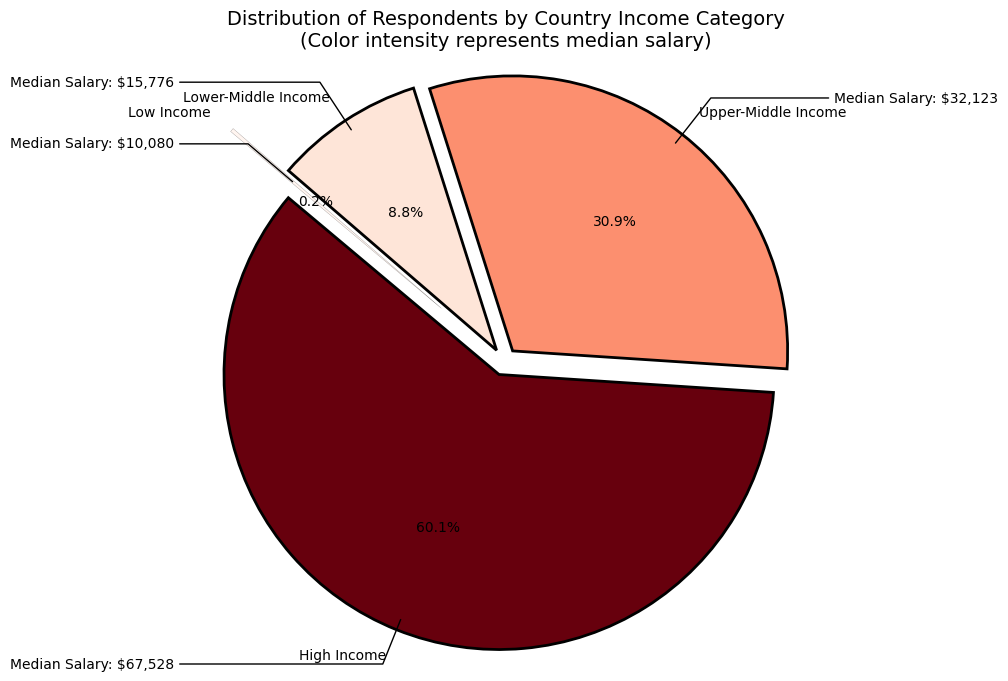

In [77]:
# Group the data by 'CountryIncomeCategory'
grouped = data_cleaned.groupby('CountryIncomeCategory')

# Calculate the count of respondents and median salary for each category
counts = grouped.size()
median_salaries = grouped['ConvertedCompYearly'].median()

# Ensure the categories are in a specific order
categories = ['High Income', 'Upper-Middle Income', 'Lower-Middle Income', 'Low Income']
counts = counts.reindex(categories)
median_salaries = median_salaries.reindex(categories)

# Normalize the median salaries to map colors
norm = plt.Normalize(median_salaries.min(), median_salaries.max())

# Use a colormap where deeper colors represent higher salaries
colors = plt.cm.Reds(norm(median_salaries))

# Adjust explode to pull out the 'Low Income' slice more
explode = [0.05, 0.05, 0.05, 0.3]  

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=categories,
    colors=colors,
    autopct='%1.1f%%',
    explode=explode,
    startangle=140,
    textprops={'color': 'black'}
)

# Add a title to the chart
ax.set_title('Distribution of Respondents by Country Income Category\n(Color intensity represents median salary)', fontsize=14)

# Bolden the boundary of each pie slice and adjust line width for 'Low Income'
for i, p in enumerate(wedges):
    # Adjust edge color and line width
    if categories[i] == 'Low Income':
        plt.setp(p, edgecolor='black', linewidth=0.1)
    else:
        plt.setp(p, edgecolor='black', linewidth=2)
    # Calculate angle for annotation
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    # Place the annotation outside the pie chart
    ax.annotate(
        f'Median Salary: ${median_salaries.iloc[i]:,.0f}',
        xy=(x, y),
        xytext=(1.2 * np.sign(x), 1.2 * y),
        horizontalalignment=horizontalalignment,
        fontsize=10,
        textcoords='data',
        arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle)
    )

# Ensure the pie chart is a circle
ax.axis('equal')

plt.show()

2.3 What is the Salary Distribution Across Different Developer Roles?

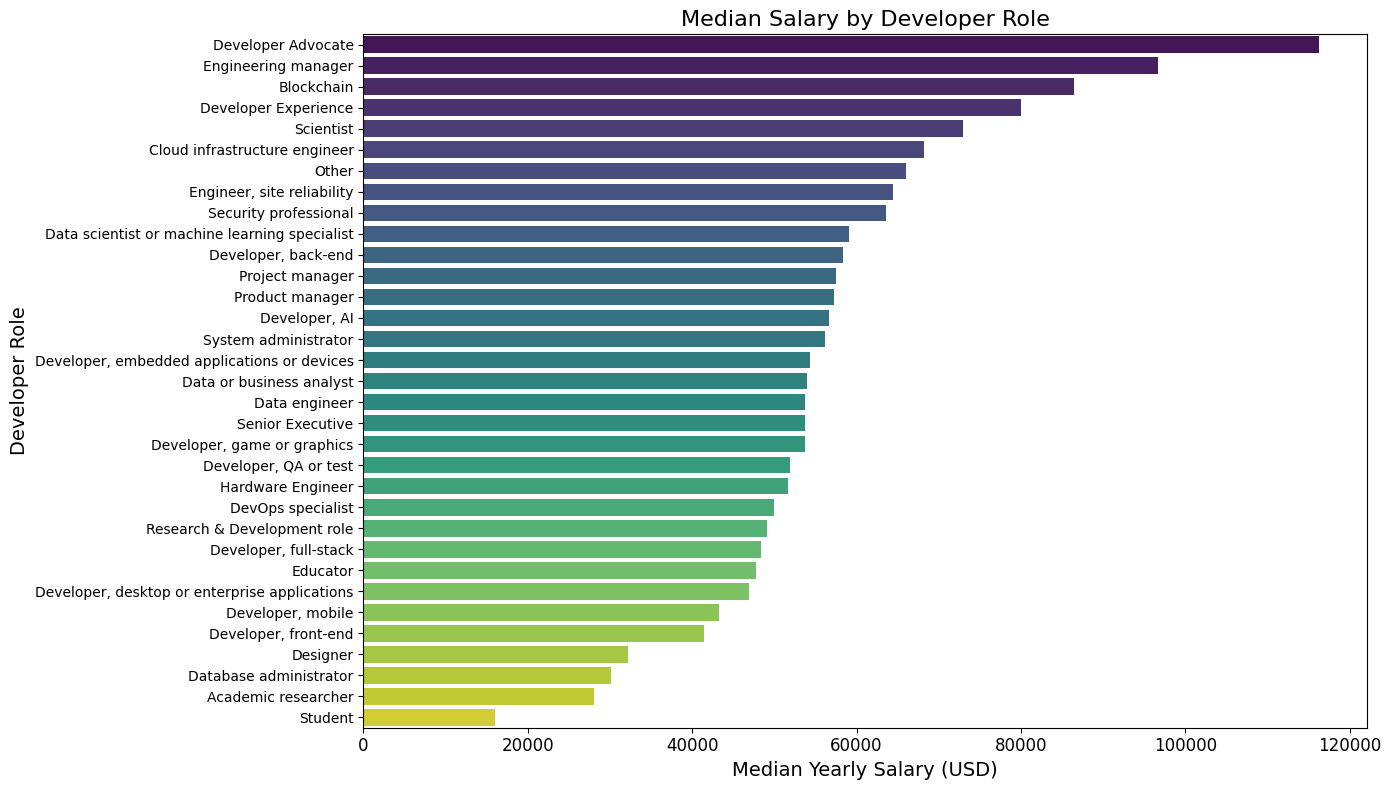

In [78]:
# Select columns
devtype_col = [col for col in data_cleaned.columns if 'DevType_' in col]
salary_col = 'ConvertedCompYearly'

# Create a new DF
df_2_3 = data_cleaned[devtype_col + [salary_col]]

# Melt the DevType columns
df_2_3 = df_2_3.melt(id_vars=[salary_col], value_vars=devtype_col, var_name='DevType', value_name='IsRole')

# Filter to include only roles the respondent has
df_2_3 = df_2_3[df_2_3['IsRole'] == 1]

# Clean up DevType names
df_2_3['DevType'] = df_2_3['DevType'].str.replace('DevType_', '').str.replace('_', ' ')

# Calculate median salary for each role
median_salaries = df_2_3.groupby('DevType')[salary_col].median().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x=median_salaries.values, y=median_salaries.index, palette='viridis')

plt.title('Median Salary by Developer Role', fontsize=16)
plt.xlabel('Median Yearly Salary (USD)', fontsize=14)
plt.ylabel('Developer Role', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


# 3 Estimating the difference between average salaries of two job modes of in-person and remote.

3.a Compute and report descriptive statistics for the two groups of in-person and remote job modes<p>
There are not exsiting missing data since the df have been cleaned.

In [79]:
# Select columns & create two new Series
remote = data_cleaned[data_cleaned['RemoteWork'] == 1]['ConvertedCompYearly']
inperson = data_cleaned[data_cleaned['RemoteWork'] == 0]['ConvertedCompYearly']

# Create a DataFrame with the summary statistics
df_3a = pd.DataFrame({
    'Remote': remote.describe(),
    'In-Person': inperson.describe()
})

# Adjustment for better readability
df_3a = df_3a.rename_axis('Yearly Salary (USD)', axis=1)
df_3a.round(2)

Yearly Salary (USD),Remote,In-Person
count,1648.00,606.00
mean,61695.51,45142.95
std,39548.92,33992.24
min,113.00,123.00
25%,30000.00,16722.00
50%,59215.00,39248.50
75%,86525.25,64444.00
max,172597.00,167125.00


3.b Perform a two-sample t-test to compare average salaries between in-person and remote job modes.<p>
First we determine which formula we need to used for the T-test (Pooled VS Unpooled). Since we don't have assumption for the equal variance of the two populations. In this case I am using unpooled form.
$$
t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$
However the question ask for pooled standard deviation. I am also going to show the pooled formula.
$$
t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{S_p^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}
$$
$$
S_p = \sqrt{\frac{(n_1 - 1) \cdot s_1^2 + (n_2 - 1) \cdot s_2^2}{n_1 + n_2 - 2}}
$$

3.b Check the assumption for T-test <p>
Assumption: The distribution is approximately normal.<p>
From the histogram, it is clear that both distributions for "Remote" and "In-Person" salaries are not symmetric and have a skewed shape. The "Remote" salary distribution appears to be positively skewed, and the "In-Person" salary distribution also shows positive skewness but is a bit more spread out. In conclusion,it is likely that the normality assumption is violated.

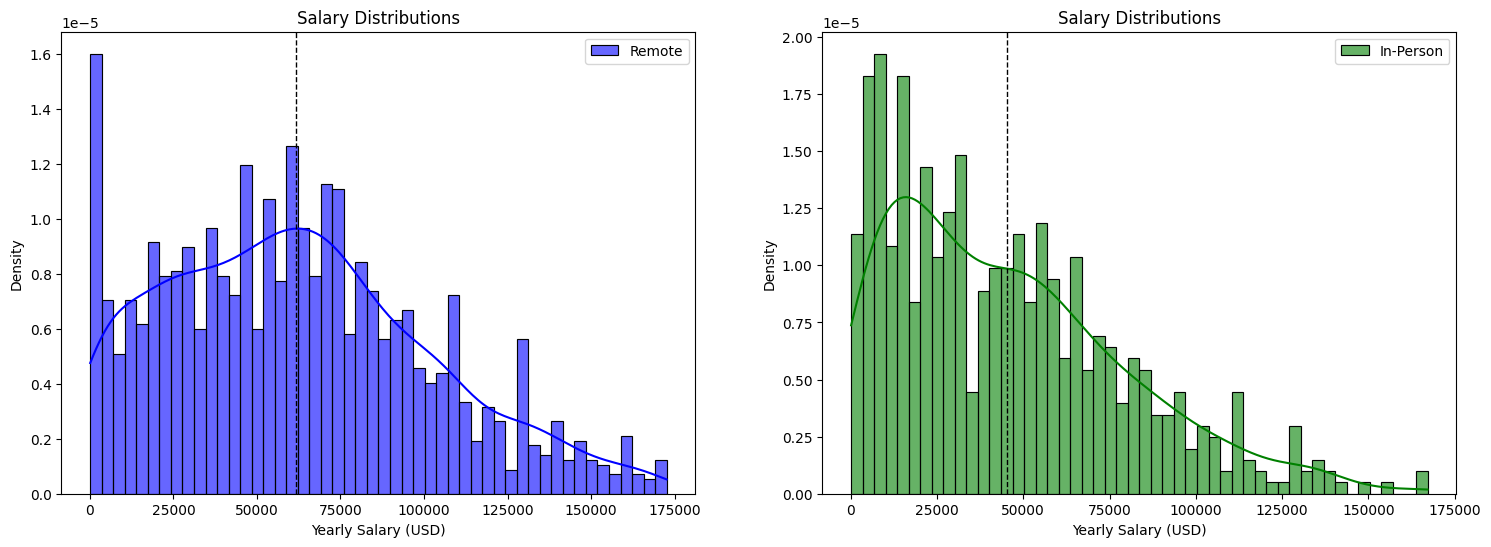

In [80]:
# Set the figure size
plt.figure(figsize=(18, 6))

# Remote Workers
plt.subplot(1, 2, 1)
sns.histplot(remote, color='blue', kde=True, label='Remote', stat='density', bins=50, alpha=0.6)
plt.title('Salary Distributions')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Density')
plt.axvline(np.mean(remote), color='black', linestyle='--', linewidth=1)
plt.legend()

# In-Person Workers Bootstrapped Means
plt.subplot(1, 2, 2)
sns.histplot(inperson, color='green', kde=True, label='In-Person', stat='density', bins=50, alpha=0.6)
plt.title('Salary Distributions')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Density')
plt.axvline(np.mean(inperson), color='black', linestyle='--', linewidth=1)
plt.legend()

# Show the plot
plt.show()

In [81]:
# change the column names for easy identification
remote_salaries = remote
inperson_salaries = inperson

# Calculate the mean for each group
mean_remote = sum(remote_salaries) / len(remote_salaries)
mean_inperson = sum(inperson_salaries) / len(inperson_salaries)


# Calculate the variance for each group
variance_remote = sum((x-mean_remote)**2 for x in remote_salaries) / len(remote_salaries)
variance_inperson = sum((x-mean_inperson)**2 for x in inperson_salaries) / len(inperson_salaries)
variance_pooled = (len(remote_salaries)* variance_remote + len(inperson_salaries)* variance_inperson) / (len(remote_salaries) + len(inperson_salaries) -2)

# Pooled standard deviation
pooled_std = variance_pooled**0.5

# T-test
t_unpooled = ((mean_remote - mean_inperson)/ ((variance_remote / len(remote_salaries) + variance_inperson / len(inperson_salaries)) ** 0.5))
t_pooled = (mean_remote - mean_inperson) / ((variance_pooled * (1/len(remote_salaries) + 1/len(inperson_salaries))) ** 0.5)

# Calculate the degrees of freedom
dfreedom = len(remote_salaries) + len(inperson_salaries) - 2

# Print T-test results
print("The Unpooled T-statistic is:", round(t_unpooled,4))
print("The Pooled T-statistic is:", round(t_pooled,4))
print("The Pooled Standard Deviation is:", round(pooled_std,4))


The Unpooled T-statistic is: 9.8013
The Pooled T-statistic is: 9.1363
The Pooled Standard Deviation is: 38135.7383


In [82]:
# Python build in
t_unpooled_python = stats.ttest_ind(remote, inperson, equal_var = False)
t_pooled_python = stats.ttest_ind(remote, inperson, equal_var = True)

# Print T-test results
print(f'T-statistic (Unpooled): {t_unpooled_python.statistic:.4f}, p-value: {t_unpooled_python.pvalue:.4f}')
print(f'T-statistic (Pooled): {t_pooled_python.statistic:.4f}, p-value: {t_pooled_python.pvalue:.4f}')

T-statistic (Unpooled): 9.7949, p-value: 0.0000
T-statistic (Pooled): 9.1363, p-value: 0.0000


3.c Bootstrap your data for comparing the mean of salary for the two groups of in-person and remote workers.

In [83]:
# Number of bootstrap replications
n_replications = 10000

# Set a random seed for reproducibility
seed = 1624
np.random.seed(seed)

# Sample size for each group
n_remote = len(remote_salaries)
n_inperson = len(inperson_salaries)

# Initialize arrays to store bootstrap means
remote_bootstrap_means = np.empty(n_replications)
inperson_bootstrap_means = np.empty(n_replications)

# Perform bootstrapping
for i in range(n_replications):
    remote_sample = np.random.choice(remote_salaries, size=n_remote, replace=True)
    inperson_sample = np.random.choice(inperson_salaries, size=n_remote, replace=True)
    
    # Compute means and store
    remote_bootstrap_means[i] = np.mean(remote_sample)
    inperson_bootstrap_means[i] = np.mean(inperson_sample)

# Display bootstrap means
print("Bootstrap Mean Salary for Remote Work:", remote_bootstrap_means.mean())
print("Bootstrap Mean Salary for In-Person Work:", inperson_bootstrap_means.mean())



Bootstrap Mean Salary for Remote Work: 61689.27595194174
Bootstrap Mean Salary for In-Person Work: 45136.59521468447


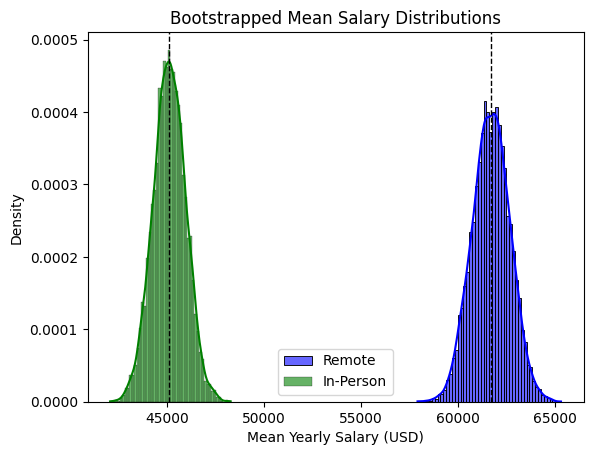

In [84]:
# Figure 1: Bootstrapped Distributions for Both Groups
# Remote Workers Bootstrapped Means
sns.histplot(remote_bootstrap_means, color='blue', kde=True, label='Remote', stat='density', bins=50, alpha=0.6)

# In-Person Workers Bootstrapped Means
sns.histplot(inperson_bootstrap_means, color='green', kde=True, label='In-Person', stat='density', bins=50, alpha=0.6)

# Add labels and title
plt.title('Bootstrapped Mean Salary Distributions')
plt.xlabel('Mean Yearly Salary (USD)')
plt.ylabel('Density')
plt.axvline(np.mean(remote_bootstrap_means), color='black', linestyle='--', linewidth=1)
plt.axvline(np.mean(inperson_bootstrap_means), color='black', linestyle='--', linewidth=1)
plt.legend()
plt.show()

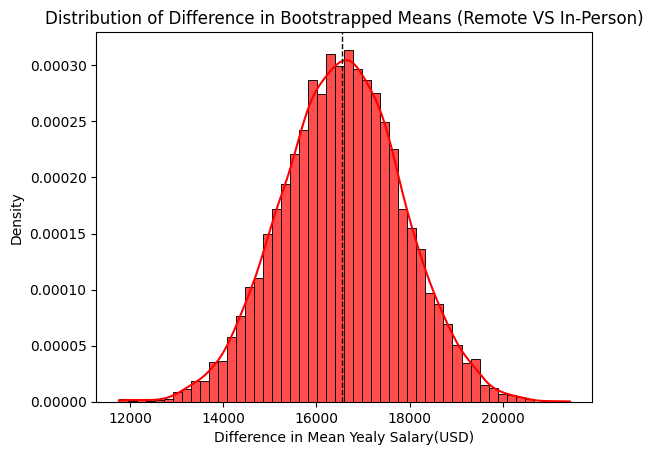

In [85]:
# Figure 2: Distribution of the Difference in Means

# Calculate the difference in means
means_diff = remote_bootstrap_means - inperson_bootstrap_means

# Plot the distribution of the difference in means
sns.histplot(means_diff, color='red', kde=True, bins=50, stat='density', alpha=0.7)
plt.title('Distribution of Difference in Bootstrapped Means (Remote VS In-Person)')
plt.xlabel('Difference in Mean Yealy Salary(USD)')
plt.ylabel('Density')
plt.axvline(x= np.mean(means_diff), color='black', linestyle='--', linewidth=1)
plt.show()

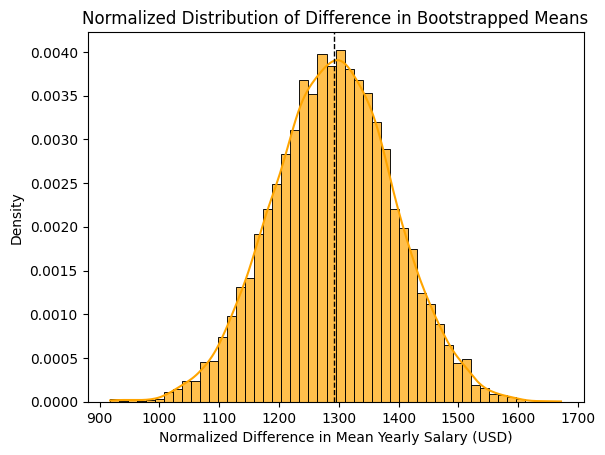

In [86]:
# Figure 3: Normalized Distribution of the Difference in Means

# Normalize the difference in means
remote_bootstrap_means_variance = np.var(inperson_bootstrap_means)
inperson_bootstrap_means_variance = np.var(remote_bootstrap_means)
pooled_se = np.sqrt((remote_bootstrap_means_variance/len(remote_bootstrap_means)) + (inperson_bootstrap_means_variance/len(inperson_bootstrap_means)))
means_diff_norm = means_diff / pooled_se

# Plot the normalized distribution of the difference in means
sns.histplot(means_diff_norm, color='orange', kde=True, bins=50, stat='density', alpha=0.7)
plt.title('Normalized Distribution of Difference in Bootstrapped Means')
plt.xlabel('Normalized Difference in Mean Yearly Salary (USD)')
plt.ylabel('Density')
plt.axvline(x=np.mean(means_diff_norm), color='black', linestyle='--', linewidth=1)
plt.show()

3.d Perform a two-sample t-test with a 0.05 threshold using bootstrapped distribution(s).<p>
The p-value of our two-sample t-test is statistically significant at the $\alpha = 0.05$ level. We reject the null hypothesis that there is no differnece between the mean salaries of remote worker 
and in-person worker based both on original data, and bootstrapped data. This leads us to conclude that the difference in mean salaries between remote and in-person workers is statistically significant. Furthermore, both bootstrapped distributions exhibit normality, thereby satisfying the assumptions required for the t-test in this analysis.


In [87]:
# Python build in
t_unpooled_python = stats.ttest_ind(remote_bootstrap_means, inperson_bootstrap_means, equal_var = False)
t_pooled_python = stats.ttest_ind(remote_bootstrap_means, inperson_bootstrap_means, equal_var = True)

# Print T-test results
print(f'T-statistic (Unpooled): {t_unpooled_python.statistic:.4f}, p-value: {t_unpooled_python.pvalue:.4f}')
print(f'T-statistic (Pooled): {t_pooled_python.statistic:.4f}, p-value: {t_pooled_python.pvalue:.4f}')

T-statistic (Unpooled): 1291.1984, p-value: 0.0000
T-statistic (Pooled): 1291.1984, p-value: 0.0000


# 4 ANOVA for hypothesis testing to compare the means of salary for three groups of Bachelor’s degree, Master’s degree, and Professional degree

4.a Compute and report descriptive statistics for the three groups of Bachelor's, master's, and Professional Degree. <p>
There are not exsiting missing data since the df have been cleaned.

In [88]:
# Select columns & create two new Series
bachelor = data_cleaned[data_cleaned['EdLevel'] == 5]['ConvertedCompYearly']
master = data_cleaned[data_cleaned['EdLevel'] == 6]['ConvertedCompYearly']
professional = data_cleaned[data_cleaned['EdLevel'] == 7]['ConvertedCompYearly']

# Create a DataFrame with the summary statistics
df_4a = pd.DataFrame({
    'Bachelor\'s Degree': bachelor.describe(),
    'Master\'s Degree': master.describe(),
    'Professional\'s Degree': professional.describe()
})

# Adjustment for better readability
df_4a = df_4a.rename_axis('Yearly Salary (USD)', axis=1)
df_4a.round(2)

Yearly Salary (USD),Bachelor's Degree,Master's Degree,Professional's Degree
count,909.00,737.00,64.00
mean,55204.17,62486.29,71682.03
std,39677.49,38383.17,36327.19
min,132.00,113.00,3096.00
25%,23308.00,32222.00,49897.75
50%,48333.00,60000.00,70448.00
75%,80000.00,85925.00,96068.75
max,172597.00,170000.00,150369.00


4.b Perform a three-sample f-test to compare average salaries between Bachelor’s degree, Master’s degree, and Professional degree <p>
Assumption for ANOVA<p>
    1.Independence: One income not afftected other's income, so this assumption holds.<p>
    2.Normality: Using histograms to check.<p>
    3.Homogeneity of Variances: Using box plots to check.<p>


4.b.2: <p>
The Normality not holds for all 3 degree. For Bachelor's degree, the distribtuion appears right-skewed, which implies that very large number of respondents earn on the the lower end, with fewer earn on the higher end.<p>
For Bachelor's Degree: This distribution appears to right skewed.
For Master's Degree: This distribution appears closer to a normal distribution, but with some right skewness.<p>
For Professional's Degree: Not clearly normal, due to fewer data points, but really close.<p>
I am still going to run the f-test as required. The challegenges will be overcome in the next section.

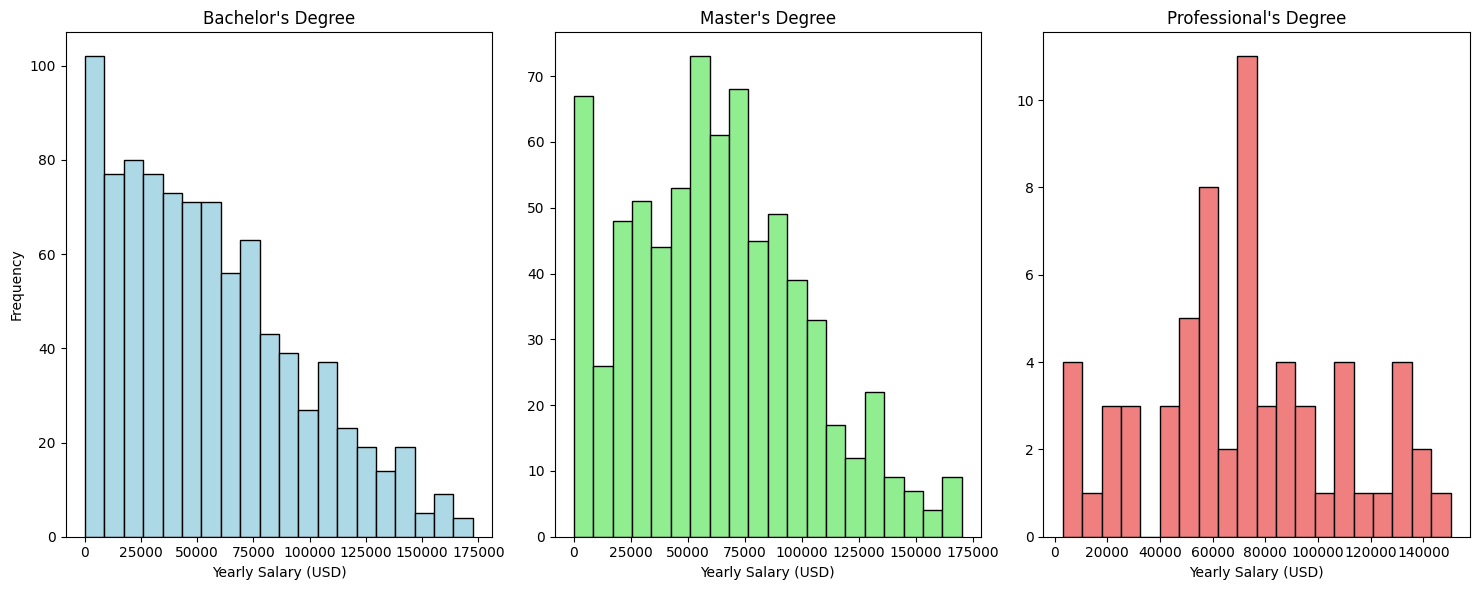

In [89]:
# Create histograms for each education level
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Histogram for Bachelor's Degree
ax[0].hist(bachelor, bins=20, edgecolor='black', color='lightblue')
ax[0].set_title("Bachelor's Degree")
ax[0].set_xlabel('Yearly Salary (USD)')
ax[0].set_ylabel('Frequency')

# Histogram for Master's Degree
ax[1].hist(master, bins=20, edgecolor='black', color='lightgreen')
ax[1].set_title("Master's Degree")
ax[1].set_xlabel('Yearly Salary (USD)')

# Histogram for Professional's Degree
ax[2].hist(professional, bins=20, edgecolor='black', color='lightcoral')
ax[2].set_title("Professional's Degree")
ax[2].set_xlabel('Yearly Salary (USD)')

# Plotting
plt.tight_layout()
plt.show()


4.b.3：<p>
Again, the homogeneity of variances may not hold across these groups. The variance in the Bachelor's Degree group appears larger than the other two groups, especially compared to the Professional's Degree group. The spread is quite different between the groups.


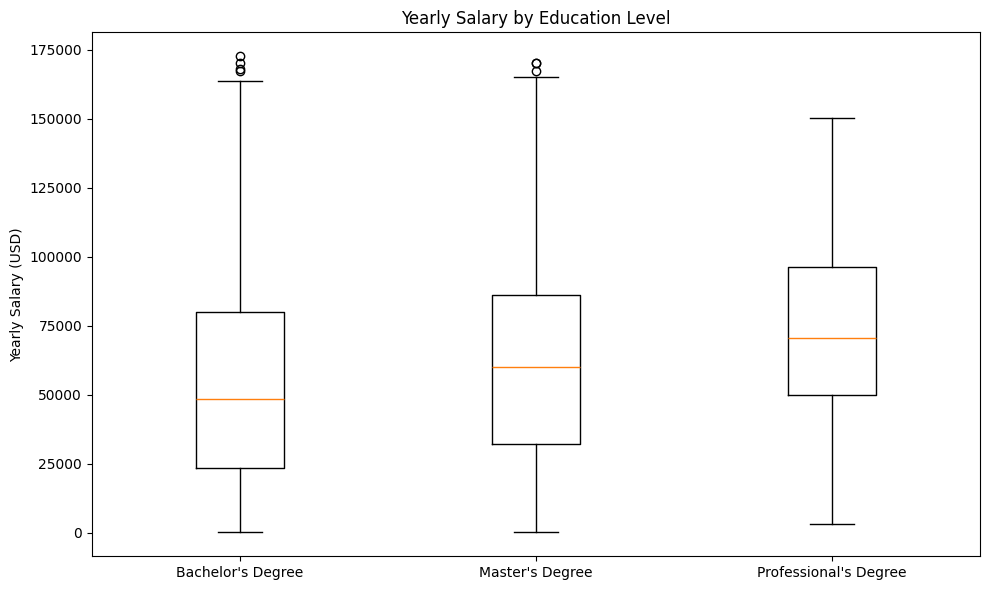

In [90]:
# Creating box plots to visually check for homogeneity of variances
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the box plots for each group
ax.boxplot(
    [bachelor, master, professional],
    labels=["Bachelor's Degree", "Master's Degree", "Professional's Degree"]
)

# Setting labels and title
ax.set_title('Yearly Salary by Education Level')
ax.set_ylabel('Yearly Salary (USD)')

# Plotting
plt.tight_layout()
plt.show()


$$
F = \frac{MSB}{MSW}     \       MSB = \frac{SSB}{df_B}      \       MSW = \frac{SSW}{df_W}
$$

$$
SSB = \sum_{i=1}^{k} n_i (\bar{X_i} - \bar{X}_{grand})^2        \       SSW = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (X_{ij} - \bar{X_i})^2
$$

$$
df_B = k - 1        \       df_W = N - k
$$

In [91]:
# Calculate the length of each group, and total number of observations
n_bachelor = len(bachelor)
n_master = len(master)
n_professional = len(professional)

N = n_bachelor + n_master + n_professional

# Calculate the mean for each group
mean_bachelor = sum(bachelor) / n_bachelor
mean_master = sum(master) / n_master
mean_professional = sum(professional) / n_professional

# Calculate the X-bar graund
grand_mean = (sum(bachelor) + sum(master) + sum(professional)) / N

# Calculate the SSB
SSB  = n_bachelor * (mean_bachelor - grand_mean) ** 2 + n_master * (mean_master - grand_mean) ** 2 + n_professional * (mean_professional - grand_mean) ** 2

# Calculate the SSW
SSW = sum((x - mean_bachelor) ** 2 for x in bachelor) + + sum((x - mean_master) ** 2 for x in master) + sum((x - mean_professional) ** 2 for x in professional)

# Calculate the two df
df_between = 3 - 1
df_within = N - 3

# Calculate the MSB and MSW
MSB = SSB / df_between
MSW = SSW / df_within

# Calculate the F-statistic
F = MSB / MSW

print(f"F-statistic: {F}")

F-statistic: 10.630548964581362


In [92]:
# Python build in
f_test = stats.f_oneway(bachelor, master, professional)

# Print f-test results
f_test

F_onewayResult(statistic=np.float64(10.630548964581363), pvalue=np.float64(2.5806334649538058e-05))

4.c Bootstrap your data for comparing the mean of salary between Bachelor’s degree, Master’s degree, and Professional degree

In [93]:
# change the column names for easy identification
bachelor_salaries = bachelor
master_salaries = master
professional_salaries = professional

# Initialize arrays to store bootstrap means
bachelor_bootstrap_means = np.empty(n_replications)
master_bootstrap_means = np.empty(n_replications)
professional_bootstrap_means = np.empty(n_replications)

# Perform bootstrapping
for i in range(n_replications):
    bachelor_sample = np.random.choice(bachelor_salaries, size=n_bachelor, replace=True)
    master_sample = np.random.choice(master_salaries, size=n_master, replace=True)
    professional_sample = np.random.choice(professional_salaries, size=n_professional, replace=True)
    
    # Compute means and store
    bachelor_bootstrap_means[i] = np.mean(bachelor_sample)
    master_bootstrap_means[i] = np.mean(master_sample)
    professional_bootstrap_means[i] = np.mean(professional_sample)

# Display bootstrap means
print("Bootstrap Mean Salary for Bachelor's Degree:", bachelor_bootstrap_means.mean())
print("Bootstrap Mean Salary for Master's Degree:", master_bootstrap_means.mean())
print("Bootstrap Mean Salary for Professional's Degree:", professional_bootstrap_means.mean())

Bootstrap Mean Salary for Bachelor's Degree: 55206.60929328933
Bootstrap Mean Salary for Master's Degree: 62489.690464586165
Bootstrap Mean Salary for Professional's Degree: 71645.987071875


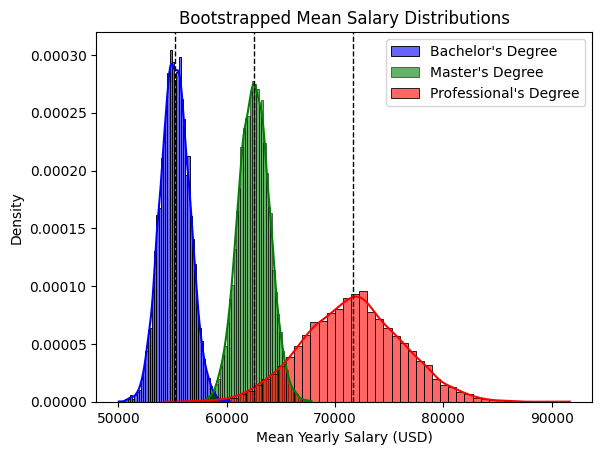

In [94]:
# Figure 1: Bootstrapped Distributions for All Groups
# Bachelor's degree Bootstrapped Means
sns.histplot(bachelor_bootstrap_means, color='blue', kde=True, label='Bachelor\'s Degree', stat='density', bins=50, alpha=0.6)

# Master's Degree Bootstrapped Means
sns.histplot(master_bootstrap_means, color='green', kde=True, label='Master\'s Degree', stat='density', bins=50, alpha=0.6)

# Professional's Degree Bootstrapped Means
sns.histplot(professional_bootstrap_means, color='red', kde=True, label='Professional\'s Degree', stat='density', bins=50, alpha=0.6)

# Add labels and title
plt.title('Bootstrapped Mean Salary Distributions')
plt.xlabel('Mean Yearly Salary (USD)')
plt.ylabel('Density')
plt.axvline(np.mean(bachelor_bootstrap_means), color='black', linestyle='--', linewidth=1)
plt.axvline(np.mean(master_bootstrap_means), color='black', linestyle='--', linewidth=1)
plt.axvline(np.mean(professional_bootstrap_means), color='black', linestyle='--', linewidth=1)
plt.legend()
plt.show()

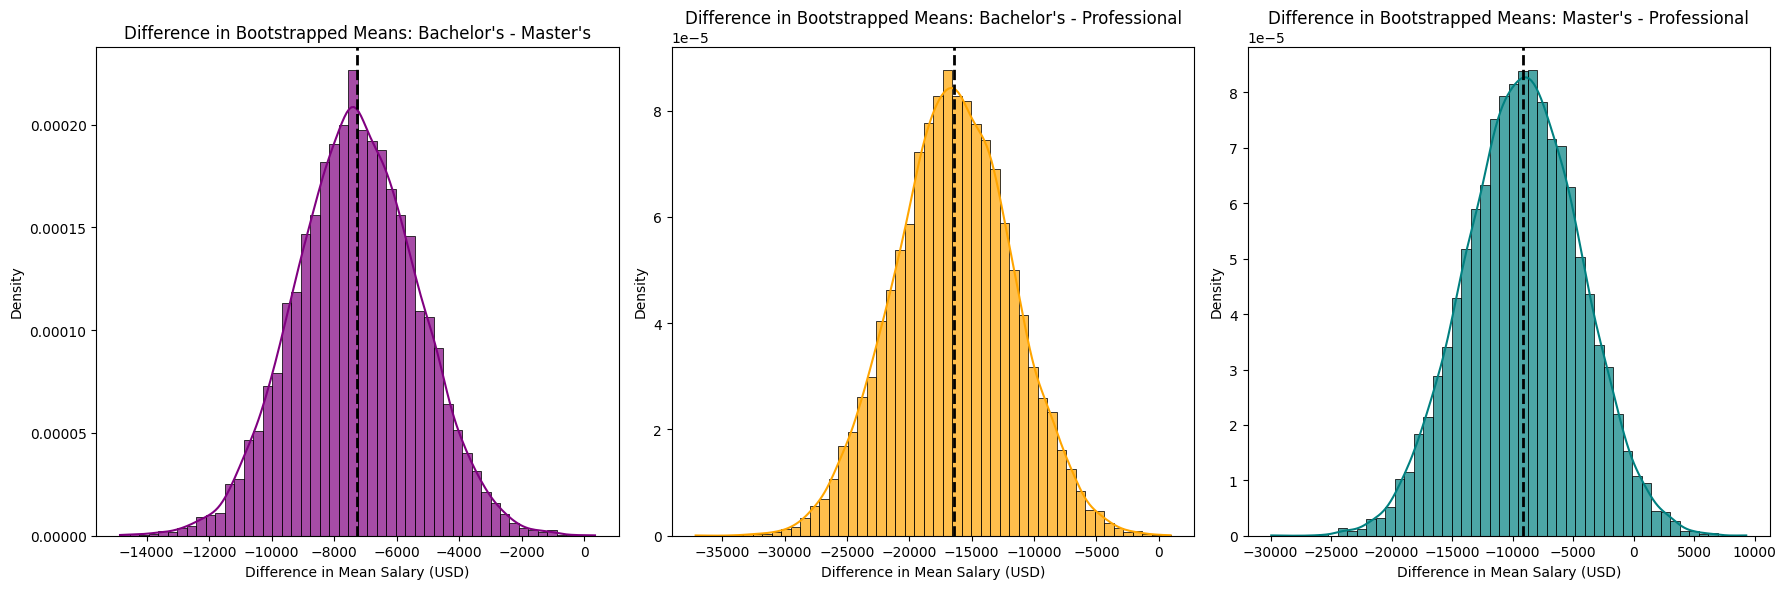

In [95]:
# Figure 2: Pairwise Distribution(s) of The Difference In Means.

# Calculate differences
diff_bachelor_master = bachelor_bootstrap_means - master_bootstrap_means
diff_bachelor_professional = bachelor_bootstrap_means - professional_bootstrap_means
diff_master_professional = master_bootstrap_means - professional_bootstrap_means

plt.figure(figsize=(18, 6))

# Bachelor's vs. Master's
plt.subplot(1, 3, 1)
sns.histplot(diff_bachelor_master, color='purple', kde=True, bins=50, stat='density', alpha=0.7)
plt.axvline(x= np.mean(diff_bachelor_master), color='black', linestyle='--', linewidth=2)
plt.title("Difference in Bootstrapped Means: Bachelor's - Master's")
plt.xlabel('Difference in Mean Salary (USD)')
plt.ylabel('Density')

# Bachelor's vs. Professional
plt.subplot(1, 3, 2)
sns.histplot(diff_bachelor_professional, color='orange', kde=True, bins=50, stat='density', alpha=0.7)
plt.axvline(x= np.mean(diff_bachelor_professional), color='black', linestyle='--', linewidth=2)
plt.title("Difference in Bootstrapped Means: Bachelor's - Professional")
plt.xlabel('Difference in Mean Salary (USD)')
plt.ylabel('Density')

# Master's vs. Professional
plt.subplot(1, 3, 3)
sns.histplot(diff_master_professional, color='teal', kde=True, bins=50, stat='density', alpha=0.7)
plt.axvline(x= np.mean(diff_master_professional), color='black', linestyle='--', linewidth=2)
plt.title("Difference in Bootstrapped Means: Master's - Professional")
plt.xlabel('Difference in Mean Salary (USD)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


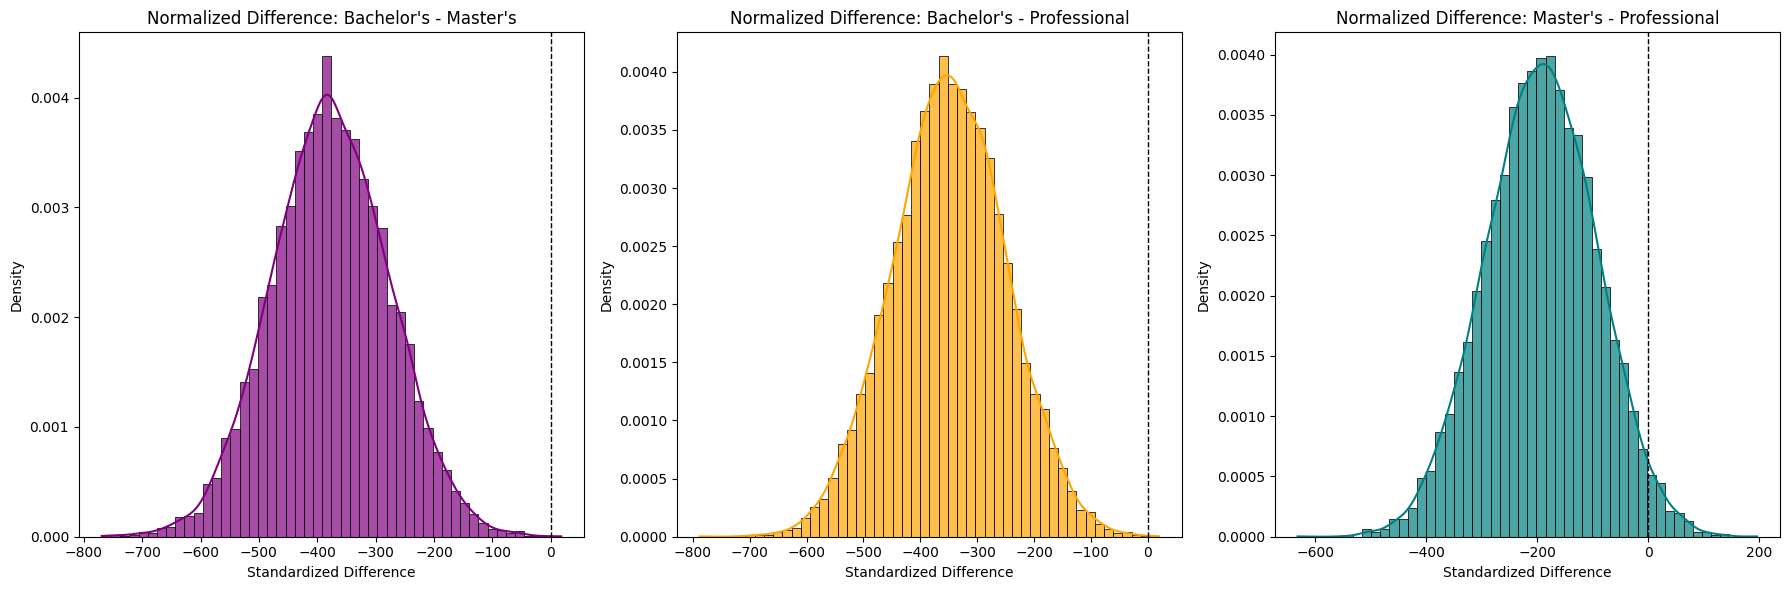

In [96]:
# Figure 3: Normalized Distribution of the Difference in Means

# Normalize the differences
variance_bachelor_bootstrap_means = np.var(bachelor_bootstrap_means)
variance_master_bootstrap_means = np.var(master_bootstrap_means)
variance_professional_bootstrap_means = np.var(professional_bootstrap_means)

diff_bachelor_master_se = np.sqrt((variance_bachelor_bootstrap_means/len(bachelor_bootstrap_means)) + (variance_master_bootstrap_means/len(master_bootstrap_means)))
diff_bachelor_professional_se = np.sqrt((variance_bachelor_bootstrap_means/len(bachelor_bootstrap_means)) + (variance_professional_bootstrap_means/len(professional_bootstrap_means)))
diff_master_professional_se = np.sqrt((variance_master_bootstrap_means/len(master_bootstrap_means)) + (variance_professional_bootstrap_means/len(professional_bootstrap_means)))

diff_bachelor_master_norm = diff_bachelor_master / diff_bachelor_master_se
diff_bachelor_professional_norm = diff_bachelor_professional / diff_bachelor_professional_se
diff_master_professional_norm = diff_master_professional / diff_master_professional_se

plt.figure(figsize=(18, 6))
# Bachelor's vs. Master's (Normalized)
plt.subplot(1, 3, 1)
sns.histplot(diff_bachelor_master_norm, color='purple', kde=True, bins=50, stat='density', alpha=0.7)
plt.title("Normalized Difference: Bachelor's - Master's")
plt.xlabel('Standardized Difference')
plt.ylabel('Density')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

# Bachelor's vs. Professional (Normalized)
plt.subplot(1, 3, 2)
sns.histplot(diff_bachelor_professional_norm, color='orange', kde=True, bins=50, stat='density', alpha=0.7)
plt.title("Normalized Difference: Bachelor's - Professional")
plt.xlabel('Standardized Difference')
plt.ylabel('Density')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

# Master's vs. Professional (Normalized)
plt.subplot(1, 3, 3)
sns.histplot(diff_master_professional_norm, color='teal', kde=True, bins=50, stat='density', alpha=0.7)
plt.title("Normalized Difference: Master's - Professional")
plt.xlabel('Standardized Difference')
plt.ylabel('Density')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


4.d Perform a ANOVA f-test with a 0.05 threshold using bootstrapped distribution(s).<p>
Based on the F-test result, there is strong evidence to suggest that at least one of the group means (bachelor, master, or professional) is significantly different from the others. This supports the conclusion that education level (bachelor, master, professional) may have a statistically significant effect on the means of yearly salary in USD

In [98]:
# Python build in
F_onewayResult = stats.f_oneway(bachelor_bootstrap_means, master_bootstrap_means, professional_bootstrap_means)

# Print f-test results
print(f'F-statistic: {F_onewayResult.statistic:.4f}, p-value: {F_onewayResult.pvalue:.4f}')

F-statistic: 84119.0057, p-value: 0.0000
